In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Breast Cancer Wisconsin dataset
data = pd.read_csv('data.csv')
X = data.drop(columns=['diagnosis','id','Unnamed: 32'])
y = data['diagnosis']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

#Scaling the variables

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

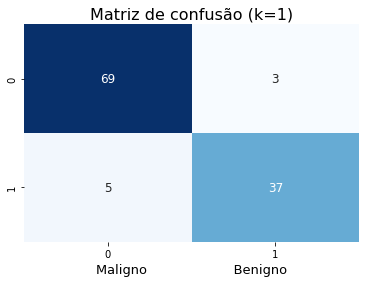

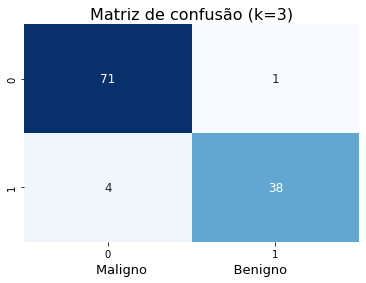

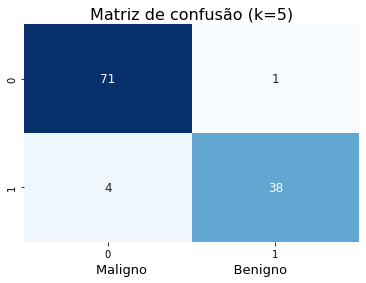

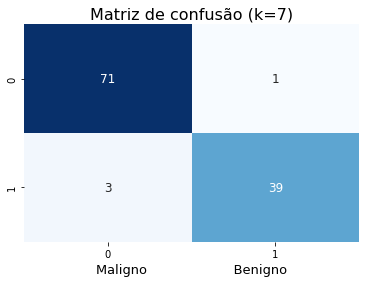

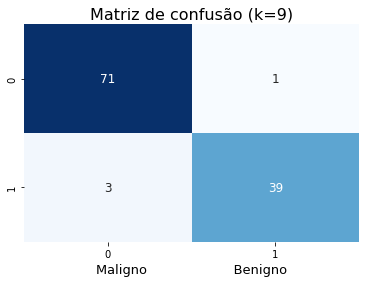

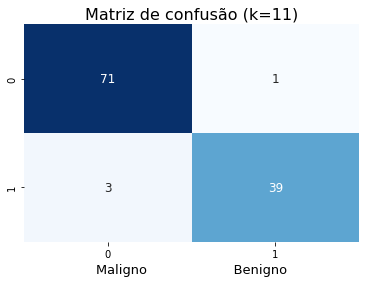

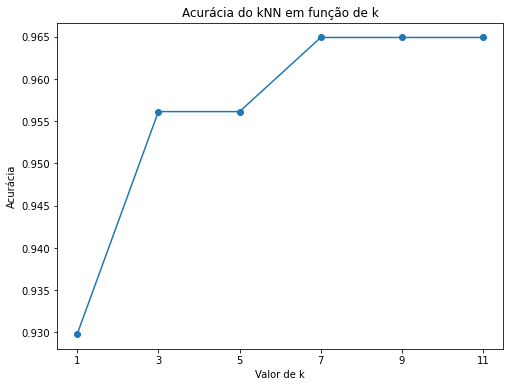

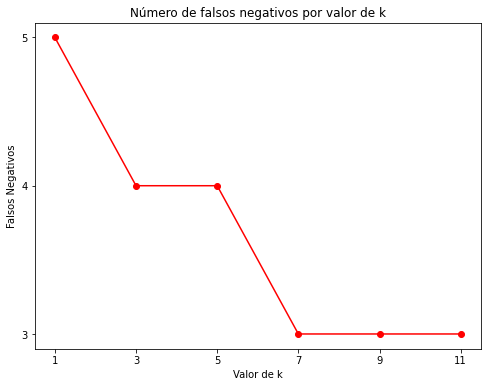

In [3]:
# Define the list of k values to try
k_values = [1, 3, 5, 7, 9, 11]

# Initialize lists to store accuracy values, confusion matrices, and false negative values
accuracies = []
cms = []
false_negatives = []

# Loop through each k value
for k in k_values:
    # Initialize and train the kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cms.append(cm)
    
    # Calculate false negatives
    fn = cm[1, 0]  # False negatives count
    false_negatives.append(fn)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='d', annot_kws={'fontsize': 12})
    ax.set_xlabel('Maligno                     Benigno', fontsize=13, ha='center')
    ax.set_title(f'Matriz de confusão (k={k})', fontsize=16)

    # Save the confusion matrix plot as PNG
    plt.savefig('confusion_matrix_k_{}.png'.format(k), format='png', bbox_inches='tight', dpi=300)
    
# Plot the accuracy values for each k
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.title('Acurácia do kNN em função de k')
plt.xticks(k_values)
plt.grid(False)

# Save the accuracy plot as PNG
plt.savefig('accuracy_plot.png', format='png', bbox_inches='tight', dpi=300)

# Plot the false negative values for each k
plt.figure(figsize=(8, 6))
plt.plot(k_values, false_negatives, marker='o', color='red')
plt.xlabel('Valor de k')
plt.ylabel('Falsos Negativos')
plt.title('Número de falsos negativos por valor de k')
plt.xticks(k_values)
plt.yticks(range(int(min(false_negatives)), int(max(false_negatives)) + 1))
plt.grid(False)

# Save the false negative plot as PNG
plt.savefig('false_negative_plot.png', format='png', bbox_inches='tight', dpi=300)

plt.show()